Данные с хакатона - https://www.machinehack.com/course/predict-the-flight-ticket-price-hackathon/

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('F:\Program\git_base\GitHub\MyRepo\DVP_02\data/final_data.csv')
data.head(5)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


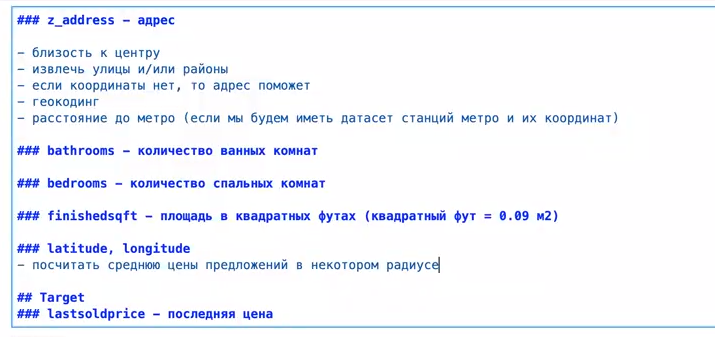

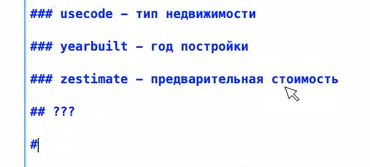

In [14]:
# удалить бессмысленный столбец
# data = data.drop(['Unnamed: 0'], axis=1)
# data = data.drop(['address'], axis=1)
# data = data.drop(['info'], axis=1)

data.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [19]:
data['usecode'].unique()

array(['Condominium', 'SingleFamily', 'MultiFamily2To4', 'Miscellaneous',
       'Duplex', 'Townhouse', 'Mobile', 'Apartment', 'Cooperative',
       'MultiFamily5Plus'], dtype=object)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 16 columns):
z_address        11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zestimate        11330 non-null float64
zindexvalue      11330 non-null object
zipcode          11330 non-null float64
zpid             11330 non-null float64
dtypes: float64(11), object(5)
memory usage: 1.4+ MB


In [ ]:
'z_address'

In [21]:
data.describe(include='all')

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
count,11330,11330.000000,11330.000000,11330.000000,11330,1.133000e+04,11330.000000,11330.000000,11330,11330.000000,11330,11330.000000,1.133000e+04,11330,11330.000000,1.133000e+04
unique,10684,NaN,NaN,NaN,954,NaN,NaN,NaN,71,NaN,10,NaN,NaN,139,NaN,NaN
top,1300 Eddy St,NaN,NaN,NaN,08/30/2013,NaN,NaN,NaN,Mission,NaN,SingleFamily,NaN,NaN,"1,167,700",NaN,NaN
freq,5,NaN,NaN,NaN,46,NaN,NaN,NaN,540,NaN,5803,NaN,NaN,469,NaN,NaN
mean,NaN,1.980229,2.614475,1585.420918,NaN,1.263928e+06,37.759711,-122.436518,NaN,6.111562,NaN,1948.498147,1.565695e+06,NaN,94116.912004,3.689973e+07
std,NaN,1.047358,1.299457,921.978245,NaN,1.042079e+06,0.025578,0.030743,NaN,12.125819,NaN,37.911196,1.229417e+06,NaN,9.400877,7.800741e+07
min,NaN,0.500000,0.000000,1.000000,NaN,5.350000e+02,37.708170,-122.510726,NaN,1.000000,NaN,1860.000000,4.323850e+05,NaN,94102.000000,1.506329e+07
25%,NaN,1.000000,2.000000,1019.000000,NaN,7.292500e+05,37.739286,-122.455157,NaN,4.000000,NaN,1916.000000,9.052375e+05,NaN,94110.000000,1.510847e+07
50%,NaN,2.000000,2.000000,1362.000000,NaN,9.900000e+05,37.760513,-122.432510,NaN,5.000000,NaN,1940.000000,1.230758e+06,NaN,94115.000000,1.515697e+07
75%,NaN,2.000000,3.000000,1876.000000,NaN,1.450000e+06,37.781386,-122.413359,NaN,7.000000,NaN,1986.000000,1.731170e+06,NaN,94123.000000,5.970040e+07


In [24]:
data.isnull().sum()

z_address        0
bathrooms        0
bedrooms         0
finishedsqft     0
lastsolddate     0
lastsoldprice    0
latitude         0
longitude        0
neighborhood     0
totalrooms       0
usecode          0
yearbuilt        0
zestimate        0
zindexvalue      0
zipcode          0
zpid             0
dtype: int64

In [28]:
data['zindexvalue']= data['zindexvalue'].str.replace(",", "").astype(int)

In [30]:
data['zindexvalue'].describe()

count    1.133000e+04
mean     1.320205e+06
std      5.848170e+05
min      6.881000e+05
25%      9.829000e+05
50%      1.211900e+06
75%      1.480400e+06
max      5.333500e+06
Name: zindexvalue, dtype: float64

In [23]:
data.isnull().count()

z_address        11330
bathrooms        11330
bedrooms         11330
finishedsqft     11330
lastsolddate     11330
lastsoldprice    11330
latitude         11330
longitude        11330
neighborhood     11330
totalrooms       11330
usecode          11330
yearbuilt        11330
zestimate        11330
zindexvalue      11330
zipcode          11330
zpid             11330
dtype: int64

Есить зависимость finishedsqft  lastsoldprice
lastsoldprice - zestimate


In [32]:
t_data = data[['finishedsqft', 'zestimate', 'bathrooms', 'bedrooms']]

In [36]:
t_data.query('finishedsqft < 25000')

,finishedsqft,zestimate,bathrooms,bedrooms
0,1043.0,1167508.0,2.0,2.0
1,903.0,823719.0,1.0,1.0
2,1425.0,1708594.0,4.0,3.0
3,2231.0,2411236.0,3.0,3.0
4,1300.0,1918539.0,3.0,3.0
...,...,...,...,...
11325,2100.0,1895813.0,2.0,3.0
11326,977.0,999443.0,2.0,2.0
11327,875.0,639167.0,1.0,2.0
11328,697.0,703197.0,1.0,2.0


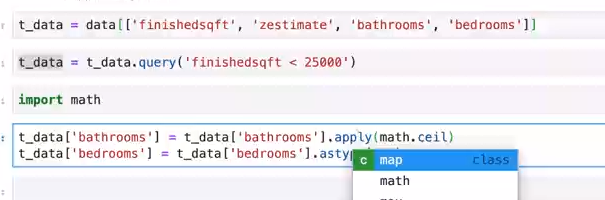

In [37]:
import math
t_data['bathrooms'] = t_data['bathrooms'].apply(math.ceil).astype(int)
t_data['bedrooms'] = t_data['bathrooms'].apply(math.ceil).astype(int)

F:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
t_data.describe()

,finishedsqft,zestimate,bathrooms,bedrooms
count,11330.000000,1.133000e+04,11330.000000,11330.000000
mean,1585.420918,1.565695e+06,2.049073,2.049073
std,921.978245,1.229417e+06,1.105308,1.105308
min,1.000000,4.323850e+05,1.000000,1.000000
25%,1019.000000,9.052375e+05,1.000000,1.000000
50%,1362.000000,1.230758e+06,2.000000,2.000000
75%,1876.000000,1.731170e+06,2.000000,2.000000
max,27275.000000,1.553325e+07,14.000000,14.000000


In [42]:
t_data.query('bathrooms == 14') #выброс, нужно убрать

,finishedsqft,zestimate,bathrooms,bedrooms
346,1308.0,804491.0,14,14
4211,1308.0,812791.0,14,14
10849,2050.0,1864778.0,14,14


In [45]:
t_data.query('bedrooms == 14') #выброс, нужно убрать

,finishedsqft,zestimate,bathrooms,bedrooms
346,1308.0,804491.0,14,14
4211,1308.0,812791.0,14,14
10849,2050.0,1864778.0,14,14


In [ ]:
t_data.query('bedrooms Ю bedrooms')

In [ ]:
t_data.round.loc[8]

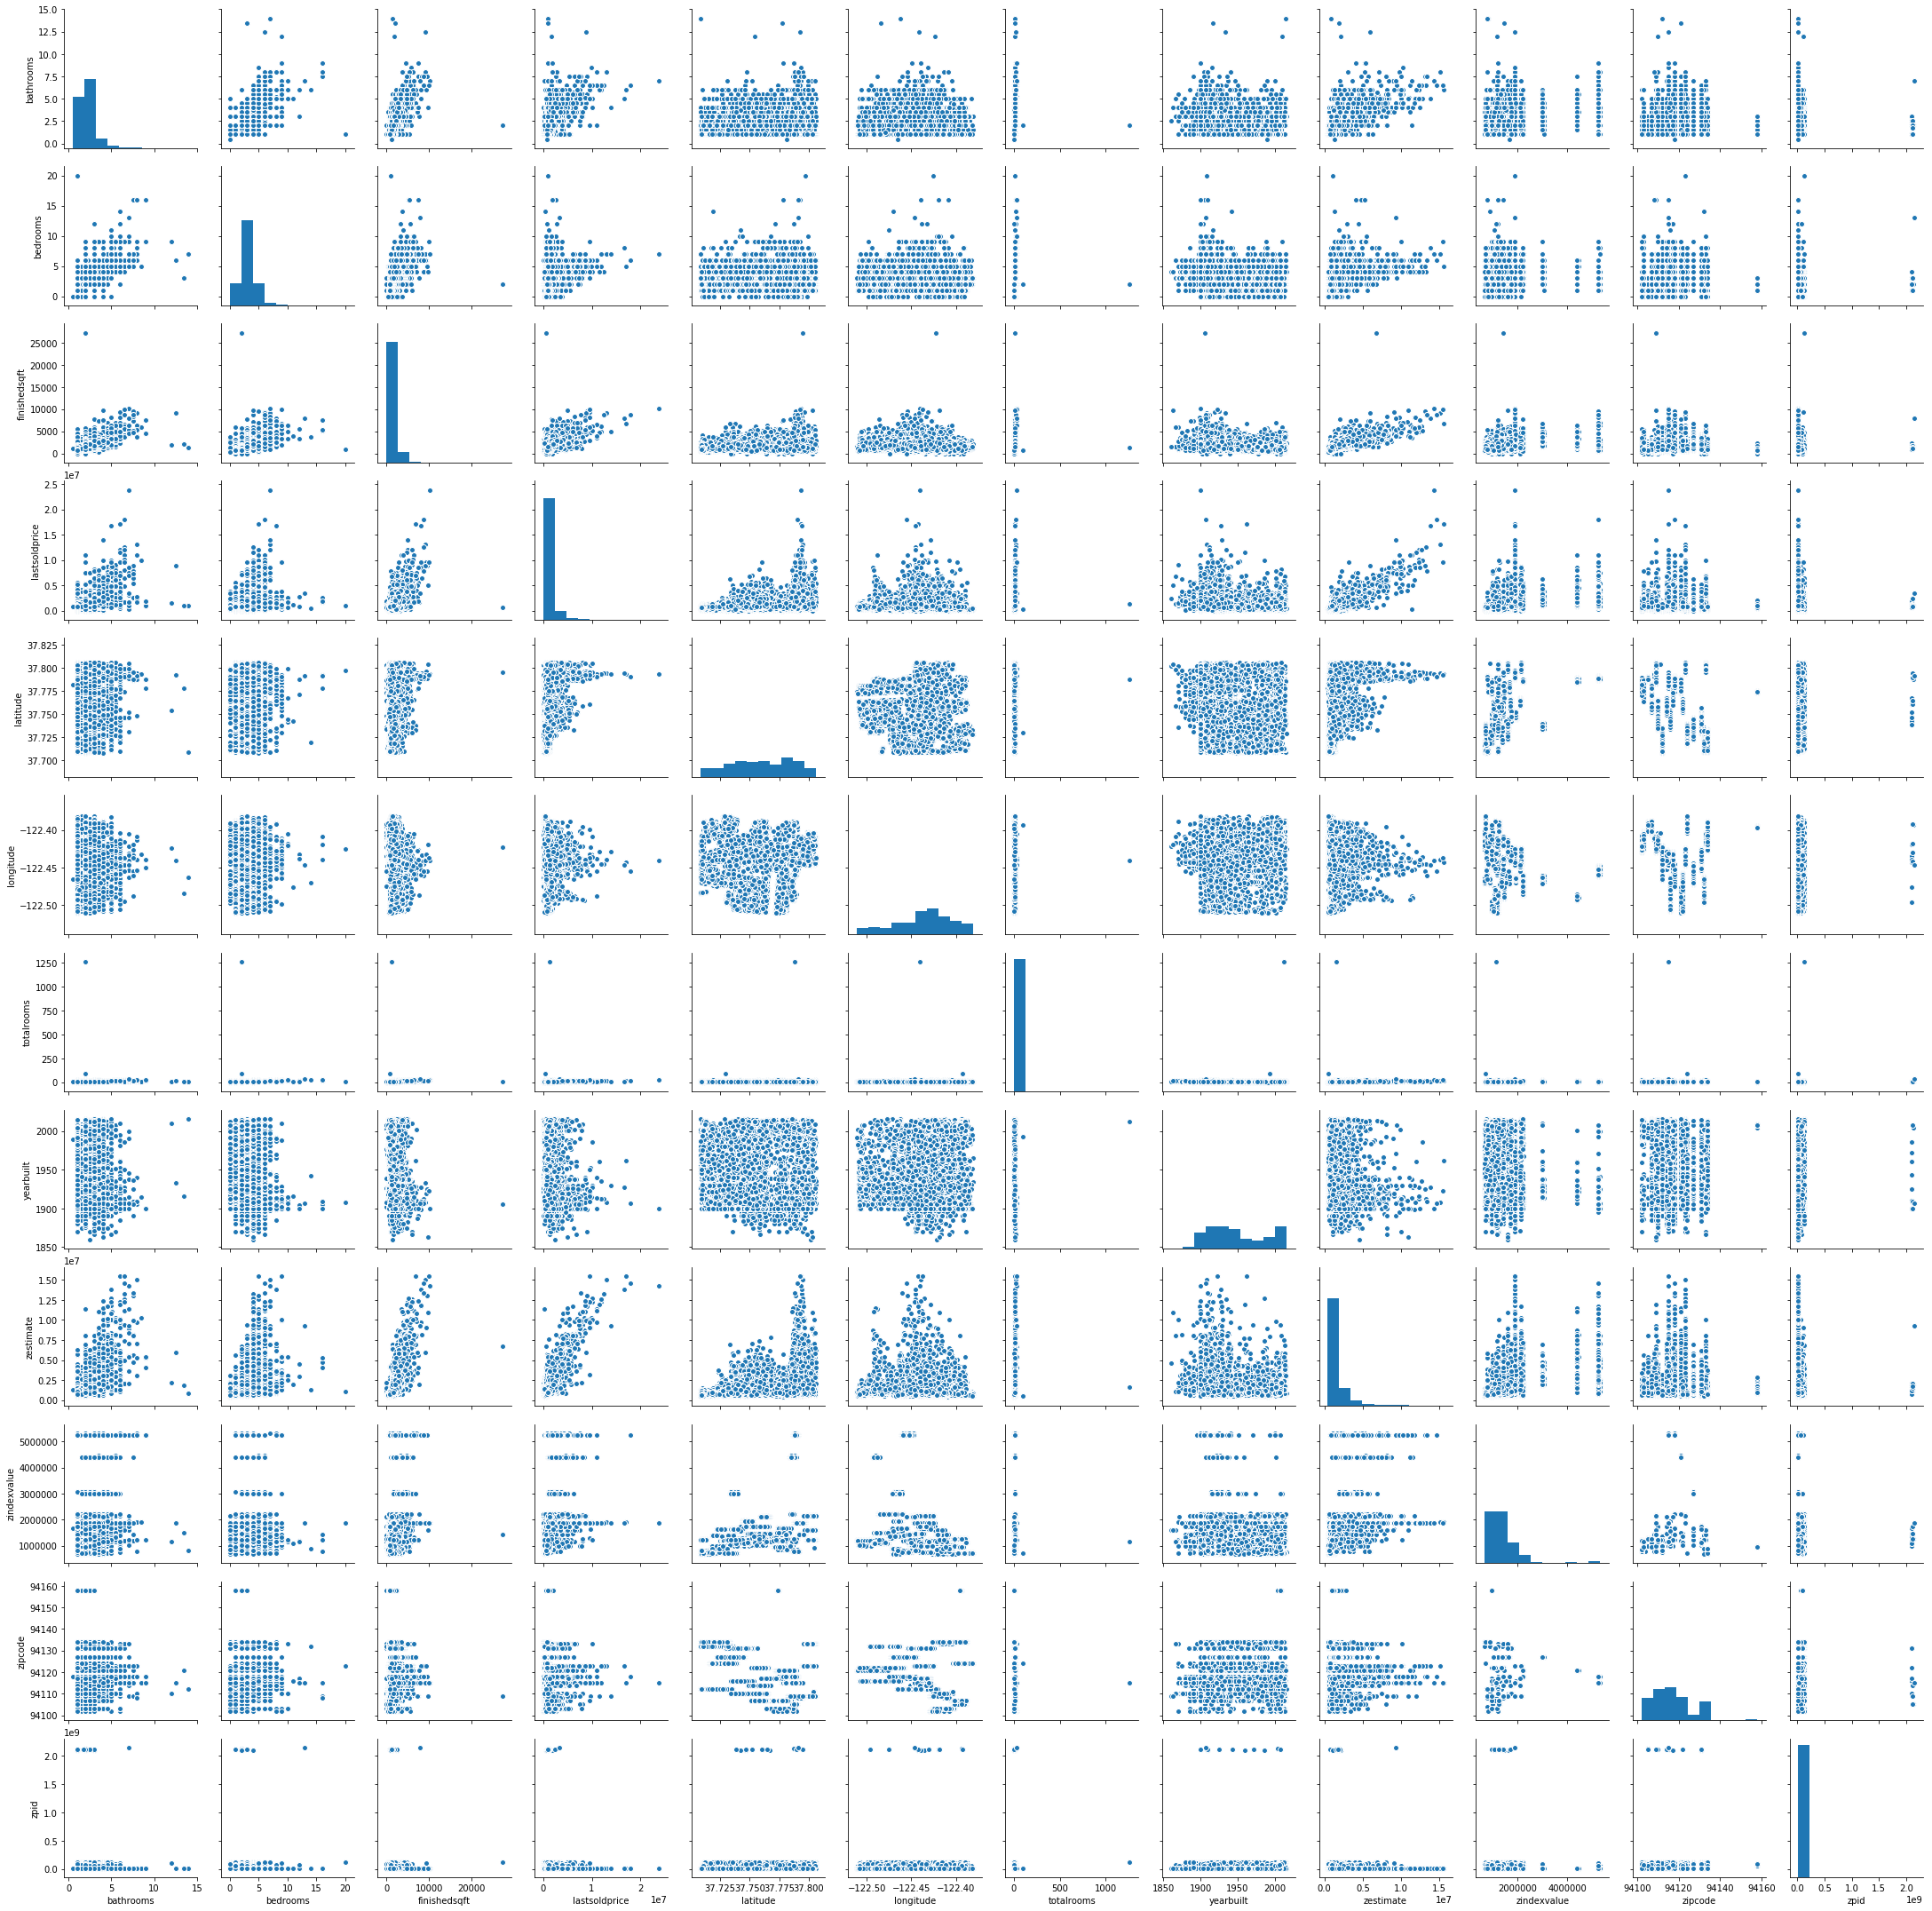

In [31]:
sns.pairplot(data)

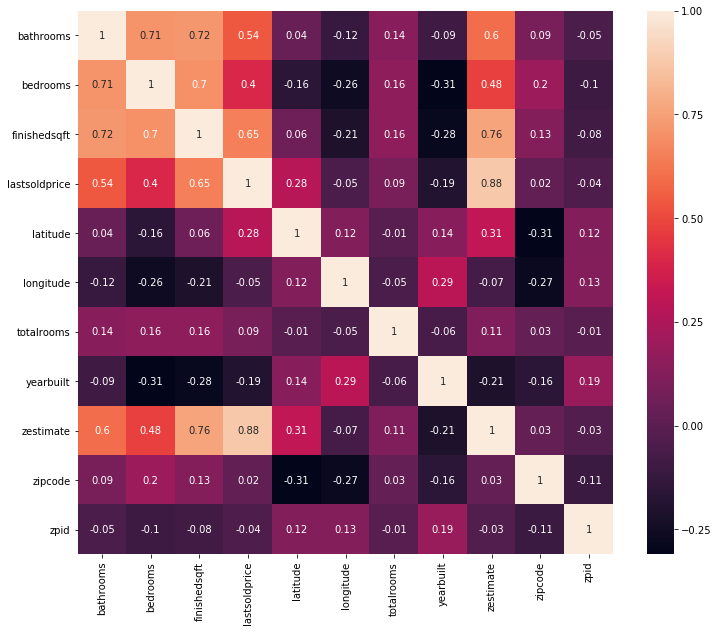

In [8]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

(array([    0,     1,     2, ..., 10681, 10682, 10683]),
 <a list of 10684 Text xticklabel objects>)

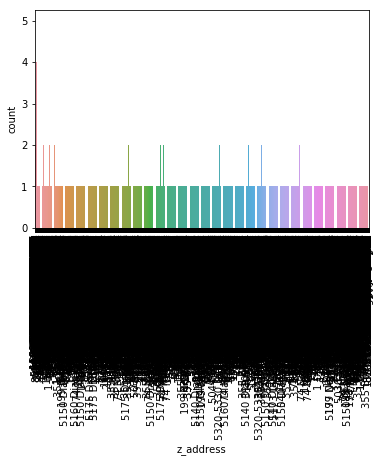

In [10]:
sns.countplot(x='z_address', data=data)
plt.xticks(rotation=90)

In [11]:
from sklearn.model_selection import train_test_split
train_test_split(X, y, test_size=0.2, random_state=30)

NameError: name 'X' is not defined

In [ ]:
import sys
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
regression_model = GridSearchCV(estimator, grid_params, cv=5, n_jobs=-1, verbose=1)
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))